In [7]:
import os
import bids

import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.datasets import sample
from mne.minimum_norm import apply_inverse_epochs, read_inverse_operator
from mne.connectivity import spectral_connectivity
from mne.viz import circular_layout, plot_connectivity_circle

In [8]:
bids_root = '/Users/sebastientourbier/Desktop/DS001-sample/derivatives/eeglab/'
subject = '01'
task = 'Face'
kind = 'eeg'

bids_basename = 'sub-{}_task-{}'.format(subject,task)
bids_fname = os.path.join(bids_root,'sub-{}'.format(subject),'eeg',bids_basename)
bids_fname = bids_fname + "_{}.set".format(kind)

print(bids_fname)
print(bids_basename)

raw = mne.read_epochs_eeglab(bids_fname)
#raw = mne_bids.read_raw_bids(bids_basename, bids_root, 'eeg', verbose=True)


/Users/sebastientourbier/Desktop/DS001-sample/derivatives/eeglab/sub-01/eeg/sub-01_task-Face_eeg.set
sub-01_task-Face
Extracting parameters from /Users/sebastientourbier/Desktop/DS001-sample/derivatives/eeglab/sub-01/eeg/sub-01_task-Face_eeg.set...


<ipython-input-8-4d6555bdbca1>:13: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  raw = mne.read_epochs_eeglab(bids_fname)
<ipython-input-8-4d6555bdbca1>:13: RuntimeWarning: Data file name in EEG.data (01_DNP_FACES_PREPROCESSED.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub-01_task-Face_eeg.fdt).
  raw = mne.read_epochs_eeglab(bids_fname)


588 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Ready.


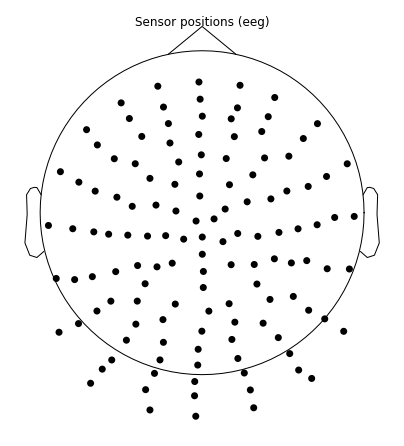

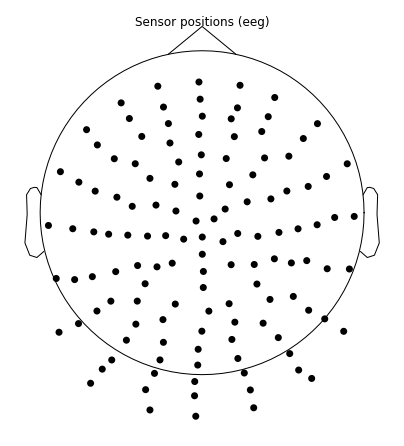

In [10]:
raw.plot_sensors()

    Using multitaper spectrum estimation with 7 DPSS windows


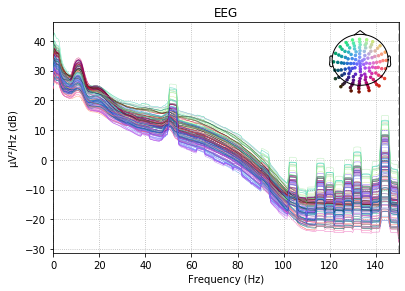

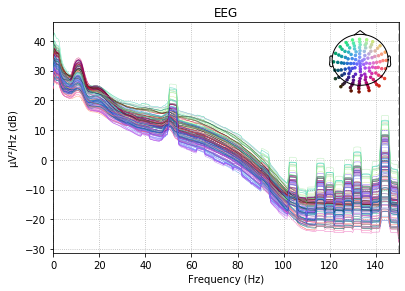

In [12]:
raw.plot_psd()

In [13]:
data = raw.get_data()

In [15]:
data.shape

(588, 128, 600)

In [17]:
raw_bcorr = raw.apply_baseline(baseline=(None,None))
noise_cov_baseline = mne.compute_covariance(raw_bcorr, tmax=0)

Applying baseline correction (mode: mean)
Computing rank from data with rank=None
    Using tolerance 1.7e-09 (2.2e-16 eps * 128 dim * 6e+04  max singular value)
    Estimated rank (eeg): 128
    EEG: rank 128 computed from 128 data channels with 0 projectors
Reducing data rank from 128 -> 128
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 976143
[done]


    The projection vectors do not apply to these channels.
Computing rank from covariance with rank=None
    Using tolerance 1.1e-12 (2.2e-16 eps * 128 dim * 37  max singular value)
    Estimated rank (eeg): 102
    EEG: rank 102 computed from 128 data channels with 0 projectors


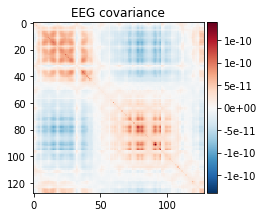

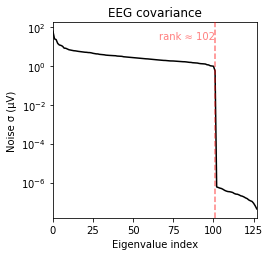

(<Figure size 273.6x266.4 with 2 Axes>, <Figure size 273.6x266.4 with 1 Axes>)

In [19]:
noise_cov_baseline.plot(raw.info, proj=True)

In [20]:
noise_cov_reg = mne.compute_covariance(raw, tmax=0., method='auto',
                                       rank=None)

Computing rank from data with rank=None
    Using tolerance 1.7e-09 (2.2e-16 eps * 128 dim * 6e+04  max singular value)
    Estimated rank (eeg): 128
    EEG: rank 128 computed from 128 data channels with 0 projectors
Reducing data rank from 128 -> 128
Estimating covariance using SHRUNK
Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 976143
log-likelihood on unseen data (descending order):
   shrunk: -211.668
   diagonal_fixed: -313.349
   empirical: -670.820
selecting best estimator: shrunk
[done]


Computing rank from covariance with rank=None
    Using tolerance 1.1e-12 (2.2e-16 eps * 128 dim * 37  max singular value)
    Estimated rank (eeg): 128
    EEG: rank 128 computed from 128 data channels with 0 projectors
Computing rank from covariance with rank={'eeg': 128}
    Setting small EEG eigenvalues to zero (without PCA)
    Created the whitener using a noise covariance matrix with rank 128 (0 small eigenvalues omitted)


<ipython-input-21-5056fc54ab93>:2: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  evoked.plot_white(noise_cov_reg, time_unit='s')


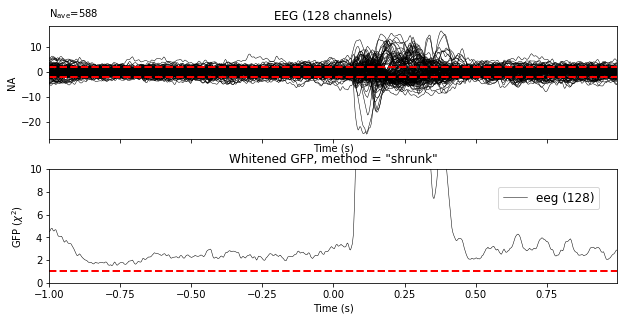

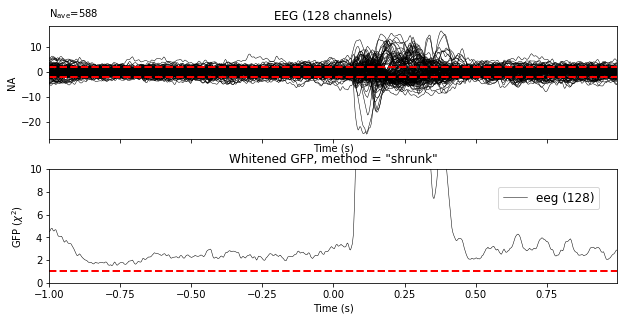

In [21]:
evoked = raw.average()
evoked.plot_white(noise_cov_reg, time_unit='s')